<a href="https://colab.research.google.com/github/djeannie29/Unsupervised-Machine-Learning/blob/main/Image_Segmentation_with_Mean_Shift_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentação de Imagem com Agrupamento Mean Shift**

---
A segmentação de imagem é um processo que agrupa pixels com atributos semelhantes. O objetivo é transformar a representação de uma imagem em algo mais significativo e fácil de analisar.

O Mean Shift é um algoritmo de agrupamento não paramétrico baseado em centróides. Ele tenta agrupar dados sem ter que ser treinado em dados rotulados. Ao contrário do K-Means, ao usar o Mean Shift, não precisamos especificar o número de clusters de antemão.

O Mean Shift é uma técnica de homogeneização local muito útil para amortecer diferenças de sombreamento ou tonalidade em objetos localizados. Ele substitui cada pixel pela média dos pixels em um "bairro" de alcance-r e cujo valor está dentro de uma distância d.

O Mean Shift é usado em uma ampla variedade de aplicações, como segmentação de imagens, sistemas de classificação acadêmica, motores de busca, medicina e muitos outros. Na segmentação de imagens, que é usada em muitos sistemas de detecção e rastreamento de objetos, torna mais fácil detectar o contorno de cada objeto.

# **Objetivos Após completar este laboratório, você será capaz de:**

Entender a Estimação de Densidade Kernel (KDE).
Descrever como o Mean Shift funciona do zero.
Implementar o Mean Shift para segmentação de imagem.
Configuração Para este laboratório, usaremos as seguintes bibliotecas:

## **Para este laboratório, usaremos as seguintes bibliotecas:**

Pandas para gerenciamento de dados.
Numpy para operações matemáticas.
Sklearn para funções relacionadas à aprendizagem de máquina e pipeline de aprendizagem de máquina.
openCV fornece uma biblioteca de Visão Computacional otimizada em tempo real, ferramentas e hardware.
Matplotlib para ferramentas adicionais de plotagem.


In [1]:
!pip install opencv-python
!pip install pandas==1.3.4
!pip installnumpy==1.21.4
!pip installmatplotlib==3.5.0
!pip installscikit-learn==0.20.1
!pip install scipy==1.7.3
!pip install pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.5.0 requires pandas>=1.5.0, but you have pandas 1.3.4 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.3.4 which is incompatible.
mizani 0.9.3 requires pandas>=1.3.5, but you have pandas 1.3.4 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.4 which is incompatible.
statsmodels 0.14.2 requires pandas!=2.1.0,>=1.4, but you have pandas 1.3.4 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, b

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [8]:
pip install pillow

# **Importando Bibliotecas Requeridas**

---
Instalando Bibliotecas Necessárias Os seguintes módulos necessários estão pré-instalados no ambiente Skills Network Labs. No entanto, se você executar este notebook comandos em um ambiente Jupyter diferente (por exemplo, Watson Studio ou Ananconda), você precisará instalar essas bibliotecas removendo o sinal # antes de !mamba na célula de código abaixo.

In [9]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Usando o google.colab para montar o drive para acessar a foto

In [14]:
from google.colab import drive
drive.mount('/content/drive/')

# substitua 'caminho/para/sua/imagem' pelo caminho real para a imagem no seu Google Drive
caminho_para_imagem = '/content/drive/My Drive/Colab Notebooks/peppers.jpeg'




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Salvando '.'

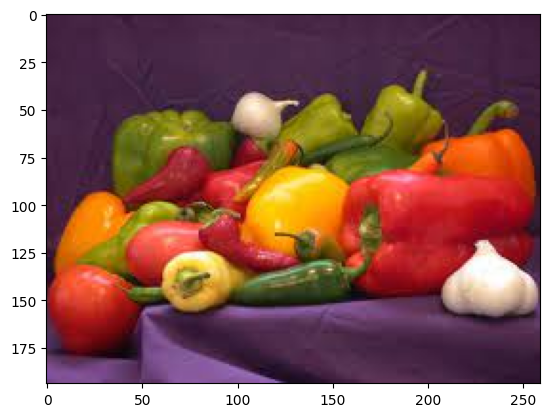

In [15]:


# Lê a imagem
img = cv.imread('/content/drive/My Drive/Colab Notebooks/peppers.jpeg')

# Converte a imagem de BGR para RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Exibe a imagem
plt.imshow(img_rgb)
plt.show()


Vamos pré-processar a imagem suavizando-a.

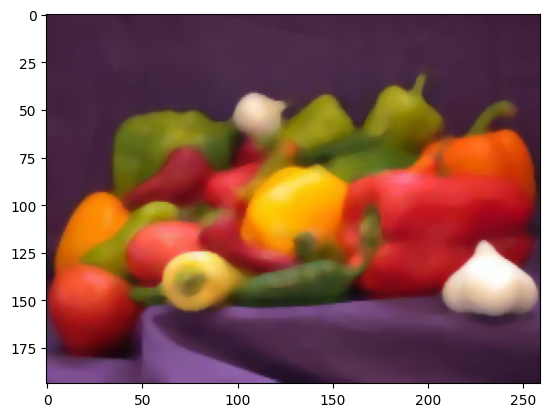

In [16]:
img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))



Podemos plotar os valores Vermelho, Verde, Azul (RGB) como pontos 3D.



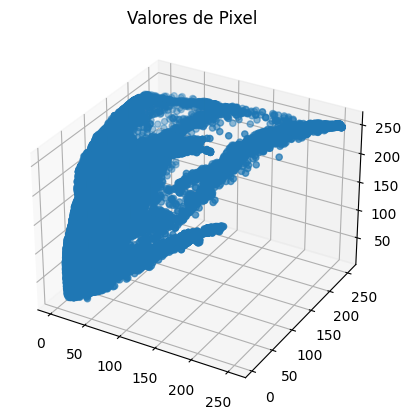

In [17]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Valores de Pixel ')
plt.show()

Temos uma imagem retangular com três canais.

In [18]:
img.shape

(194, 259, 3)

Convertemos a imagem para 194 x 259 linhas (194 x 259 = 50246, que é a forma de nossa matriz) para cada pixel, e três colunas para cada canal de cor (Vermelho, Verde, Azul), como uma matriz numpy de X:

In [19]:
X = img.reshape((-1,3))
print("shape: ",X.shape)
print("data type   : ",X.dtype)

shape:  (50246, 3)
data type   :  uint8


Como podemos ver, o tipo de dado é unit8, então, precisamos convertê-lo para float32.

In [20]:
X = np.float32(X)

# **Aplicar Mean Shift à Imagem **

---

Estime a largura de banda a ser usada com o algoritmo mean-shift, usando a função estimate_bandwidth:

X: array-like de forma (n_samples, n_features)
Pontos de entrada. quantile: float, default=0.3 Deve estar entre [0, 1], 0.5 significa que a mediana de todas as distâncias em pares é usada.
n_samples: int, O número de amostras a serem usadas. Se não for dado, todas as amostras devem ser usadas.

In [21]:
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
bandwidth

33.51403269933768

# **Podemos criar um objeto MeanShift no sklearn com os seguintes parâmetros:**

bandwidth:float, default=None Largura de banda usada no kernel RBF.
max_itert: (default=300) Número máximo de iterações por ponto de semente antes que a operação de agrupamento termine (para aquele ponto de semente), se ainda não convergiu.
bin_seeding :se verdadeiro, as localizações iniciais do kernel não são localizações de todos os pontos, mas sim a localização da versão discretizada dos pontos.
Em seguida, ajustamos o modelo.

In [22]:
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=33.51403269933768, bin_seeding=True)

Agora, temos o rótulo correspondente ao rótulo de cada linha.

In [23]:
labeled=ms.labels_
labeled

array([0, 0, 0, ..., 0, 0, 0])

Para cada amostra, podemos encontrar os clusters atribuídos.

In [24]:
clusters=ms.predict(X)
clusters

array([0, 0, 0, ..., 0, 0, 0])

Podemos listar os clusters únicos.

In [25]:
np.unique(labeled)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Também podemos listar as localizações reais dos centróides dos clusters, que também são os valores RGB.

In [26]:
ms.cluster_centers_

array([[ 67.19606 ,  37.927944,  70.074814],
       [ 32.38643 ,  29.431494, 173.7524  ],
       [ 25.335648,  94.10284 ,  98.0142  ],
       [ 25.08942 , 130.47505 , 141.56128 ],
       [127.69194 ,  73.29858 , 115.98683 ],
       [ 14.098269,  95.66574 , 230.2173  ],
       [  9.878764, 132.11331 , 245.06735 ],
       [  8.750482, 182.74567 , 251.81984 ],
       [158.78459 , 185.80435 , 217.75691 ],
       [191.184   , 215.884   , 241.426   ],
       [240.2958  , 246.98953 , 251.78273 ],
       [ 88.08382 , 214.68497 , 249.59248 ]], dtype=float32)

Podemos converter os clusters para o tipo de dado unit8 para imagens:

In [27]:
cluster_int8=np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 67,  37,  70],
       [ 32,  29, 173],
       [ 25,  94,  98],
       [ 25, 130, 141],
       [127,  73, 115],
       [ 14,  95, 230],
       [  9, 132, 245],
       [  8, 182, 251],
       [158, 185, 217],
       [191, 215, 241],
       [240, 246, 251],
       [ 88, 214, 249]], dtype=uint8)

Também podemos estimar a qual cluster cada amostra pertence, da seguinte forma:

In [28]:
ms.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

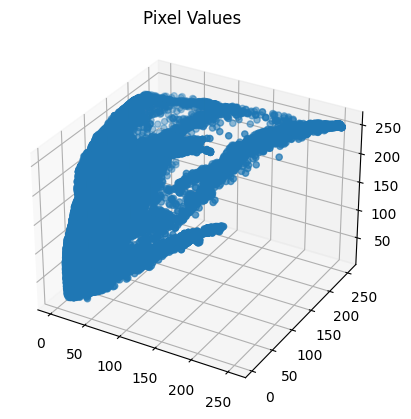

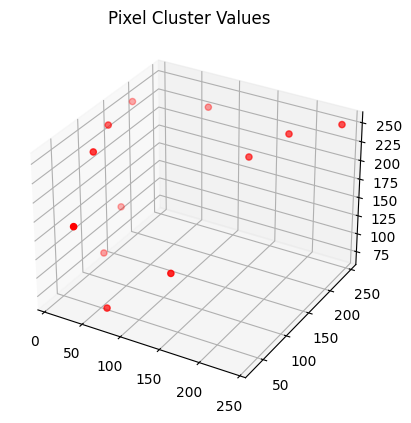

In [29]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

ax = plt.axes(projection ="3d")
ax.set_title('Pixel Cluster Values  ')
ax.scatter3D(cluster_int8[:,0],cluster_int8[:,1],cluster_int8[:,2],color='red')
plt.show()

Podemos atribuir cada ponto de dados ao valor do cluster e remodelá-lo de volta para uma imagem retangular.

In [30]:
result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]


result=result.reshape(img.shape)

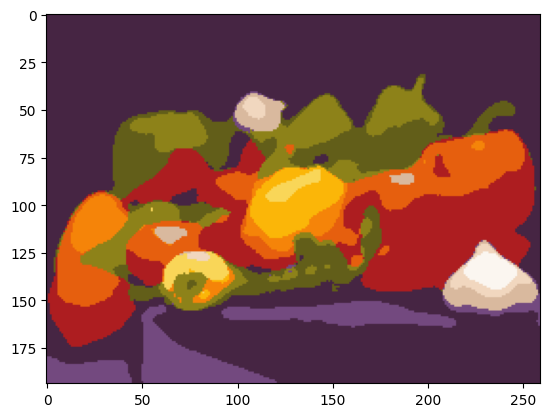

In [31]:
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

Agora, plotamos cada cluster, como um valor de cluster, e vemos que cada cluster corresponde a um objeto diferente.

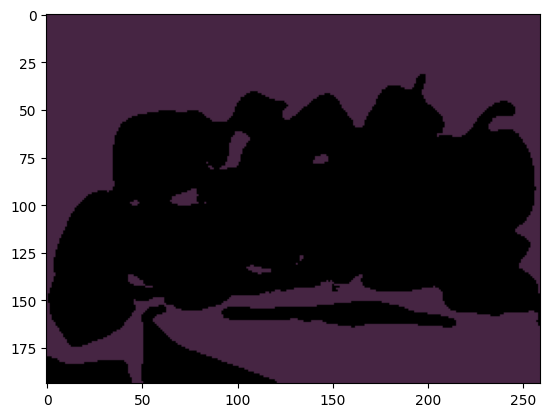

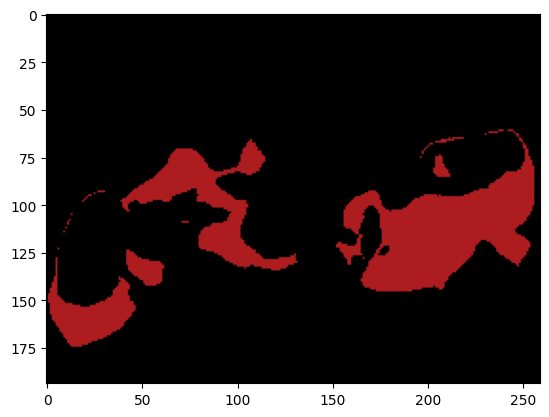

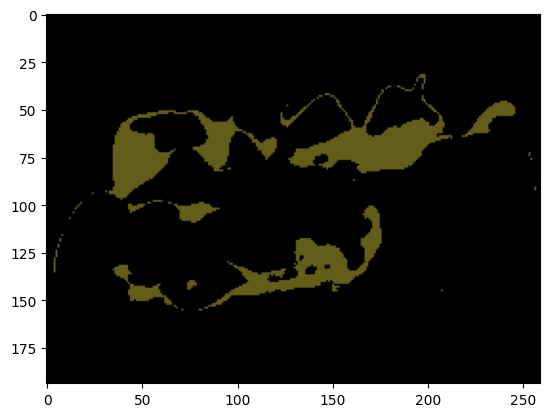

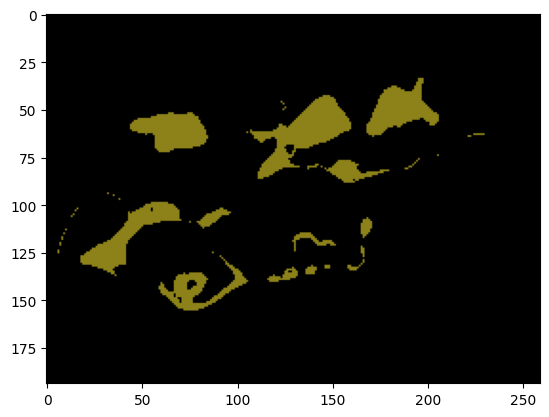

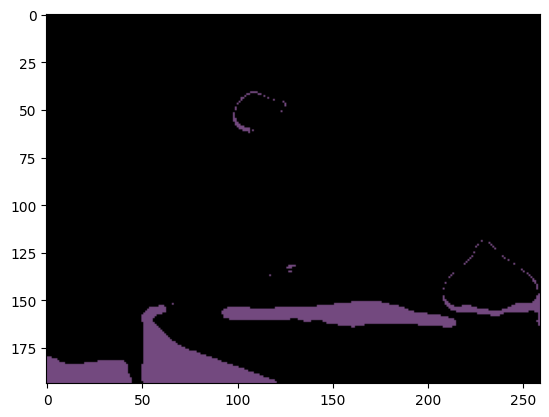

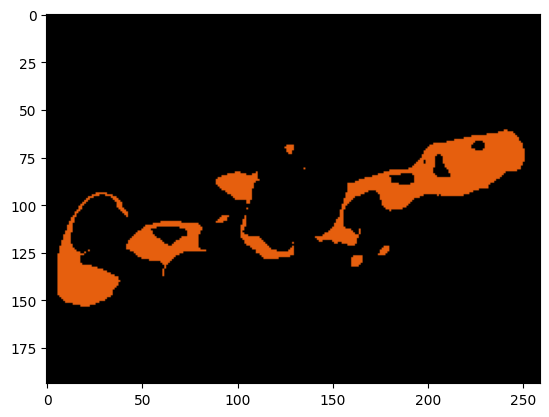

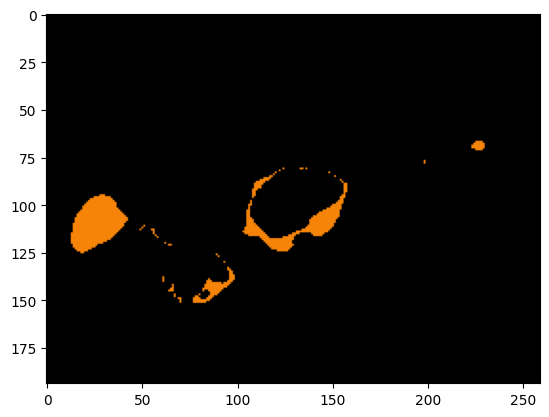

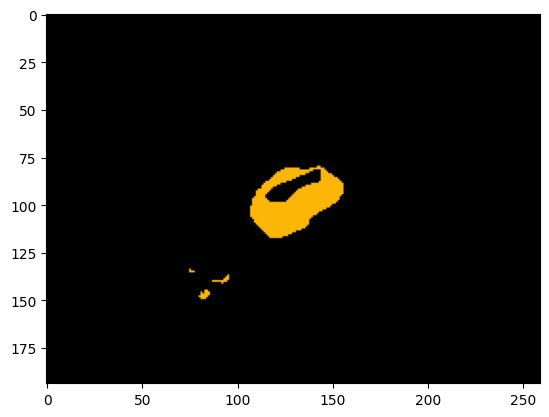

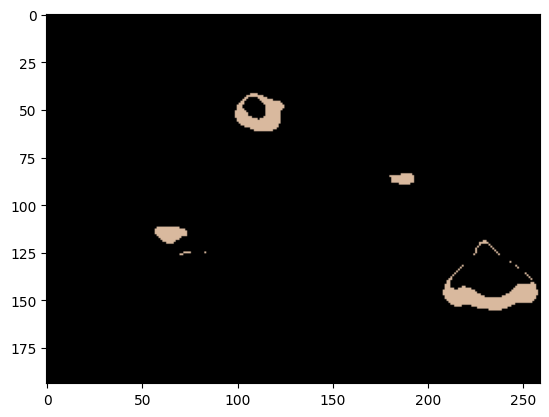

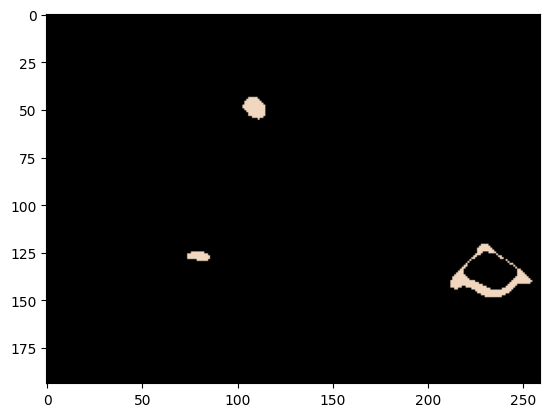

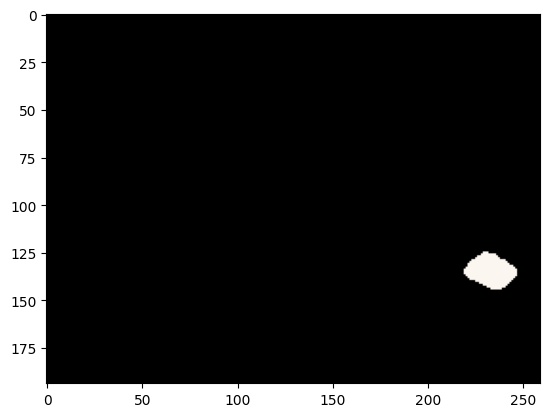

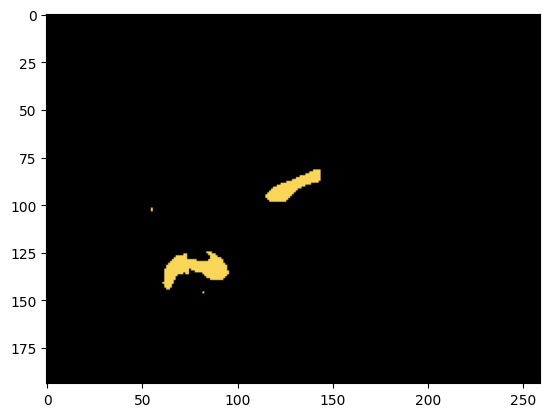

In [32]:
for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()

Portanto, classificamos nossas imagens de acordo com seus diferentes tipos de vegetais, usando o agrupamento Mean Shift.

Exercícios

Exercício 1 - Repita o processo de segmentação de imagem acima para uma nova imagem na internet
Execute a célula abaixo para baixar a imagem da web:

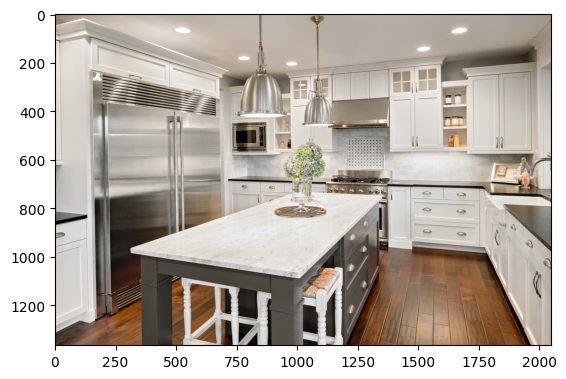

In [33]:
import requests
caminho_para_imagem = '/content/drive/My Drive/Colab Notebooks/slider-image-2.jpg'

img = cv.imread(caminho_para_imagem)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

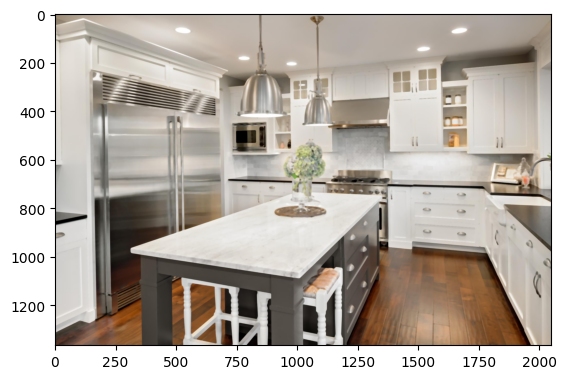

In [34]:

img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


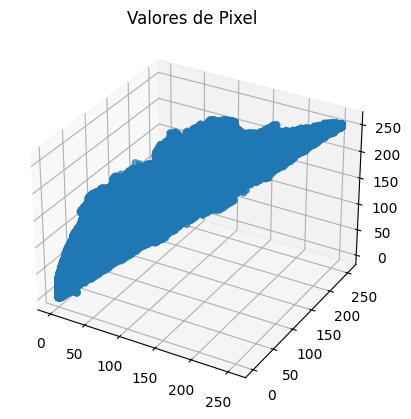

In [35]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Valores de Pixel ')
plt.show()

In [36]:
img.shape

(1366, 2048, 3)

In [37]:
X = img.reshape((-1,3))
print("shape: ",X.shape)
print("data type   : ",X.dtype)

shape:  (2797568, 3)
data type   :  uint8


In [38]:
X = np.float32(X)

In [39]:

bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=18.1459188053654, bin_seeding=True)

In [40]:
labeled=ms.labels_
labeled


array([3, 3, 3, ..., 1, 1, 1])

In [41]:
clusters=ms.predict(X)
clusters

array([3, 3, 3, ..., 1, 1, 1])

In [42]:
ms.cluster_centers_

array([[209.27864 , 215.24019 , 218.68954 ],
       [168.71143 , 177.98416 , 186.23409 ],
       [ 64.59265 ,  71.73277 ,  78.65522 ],
       [123.00343 , 135.30879 , 143.842   ],
       [ 46.4066  ,  54.12953 ,  60.896587],
       [ 31.198093,  37.36469 ,  44.363037],
       [ 83.723145,  93.82452 , 102.056274],
       [ 53.11785 ,  89.76224 , 135.69229 ],
       [248.37216 , 250.1112  , 251.14207 ],
       [128.97368 , 197.04167 , 248.96272 ],
       [ 71.45725 , 159.30855 , 123.434944],
       [ 82.8255  , 121.167786, 220.81879 ],
       [ 49.65306 , 124.46939 , 102.38776 ],
       [ 19.285715, 125.809525, 105.61905 ]], dtype=float32)

In [43]:
cluster_int8=np.uint8(ms.cluster_centers_)
cluster_int8

array([[209, 215, 218],
       [168, 177, 186],
       [ 64,  71,  78],
       [123, 135, 143],
       [ 46,  54,  60],
       [ 31,  37,  44],
       [ 83,  93, 102],
       [ 53,  89, 135],
       [248, 250, 251],
       [128, 197, 248],
       [ 71, 159, 123],
       [ 82, 121, 220],
       [ 49, 124, 102],
       [ 19, 125, 105]], dtype=uint8)

In [44]:
ms.predict(X)

array([3, 3, 3, ..., 1, 1, 1])

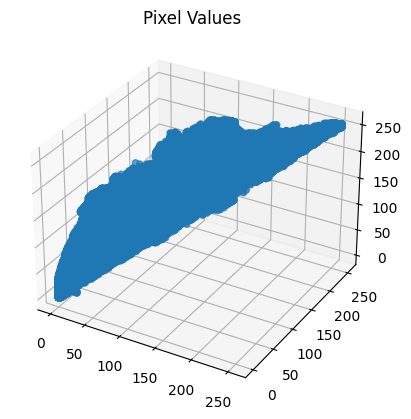

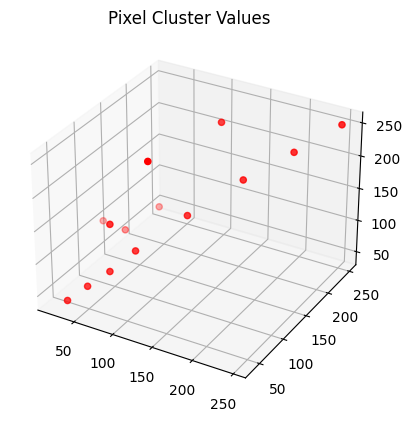

In [45]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

ax = plt.axes(projection ="3d")
ax.set_title('Pixel Cluster Values  ')
ax.scatter3D(cluster_int8[:,0],cluster_int8[:,1],cluster_int8[:,2],color='red')
plt.show()

In [46]:
result=np.zeros(X.shape,dtype=np.uint8)
labeled=ms.labels_
result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]

result=result.reshape(img.shape)

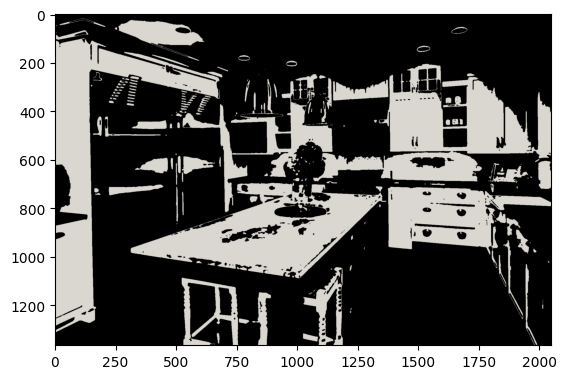

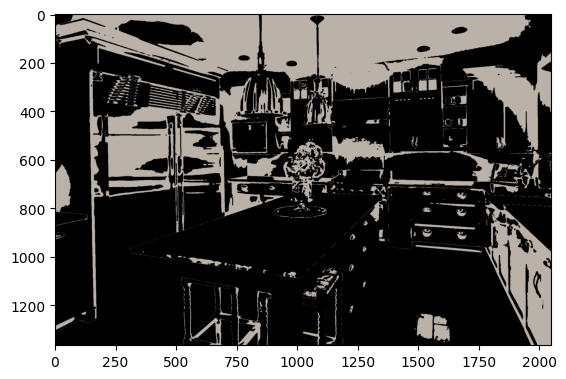

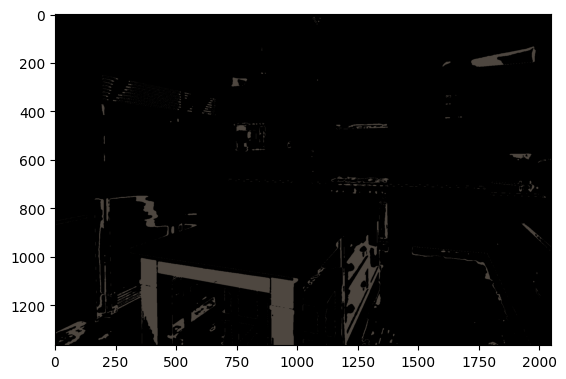

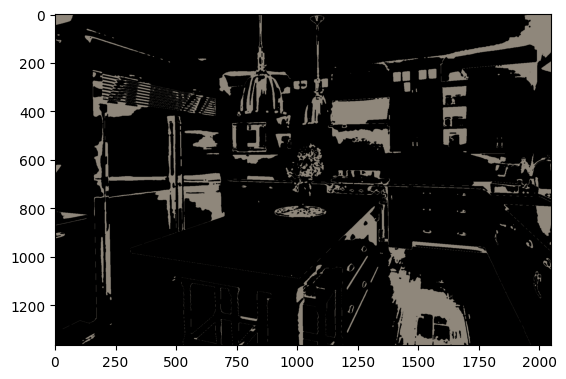

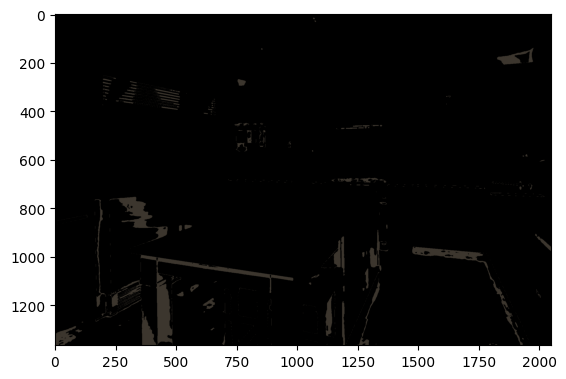

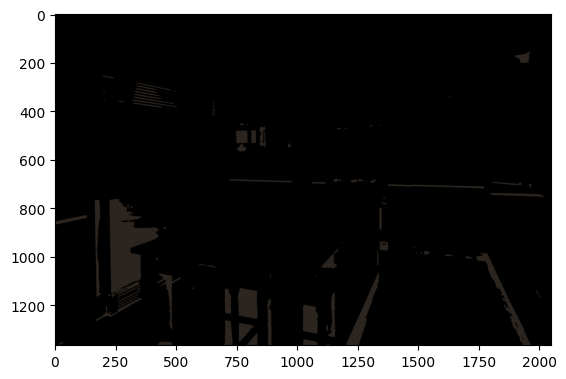

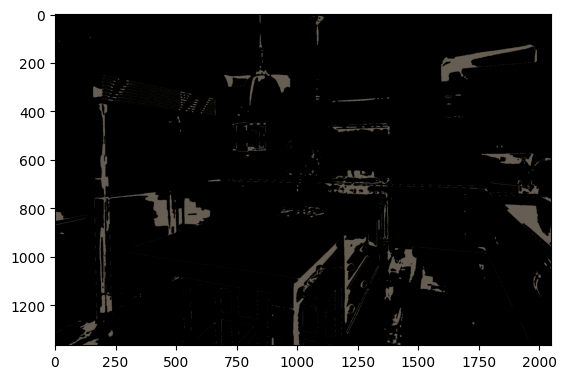

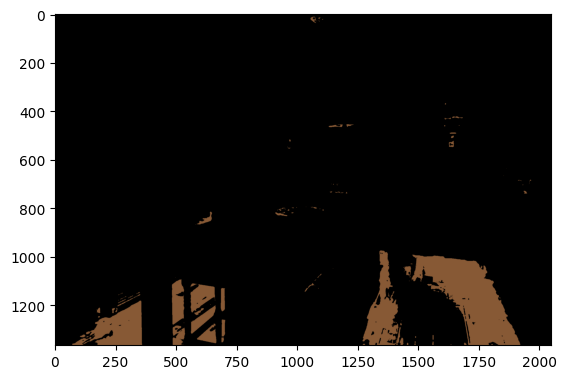

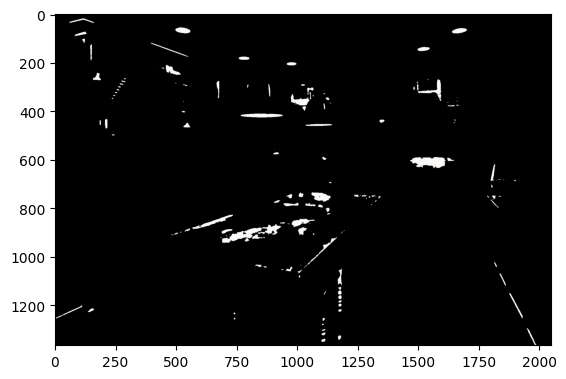

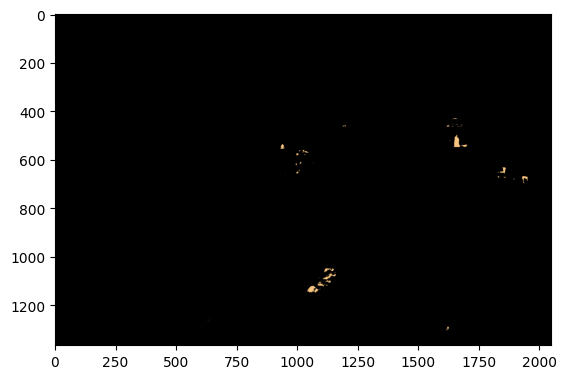

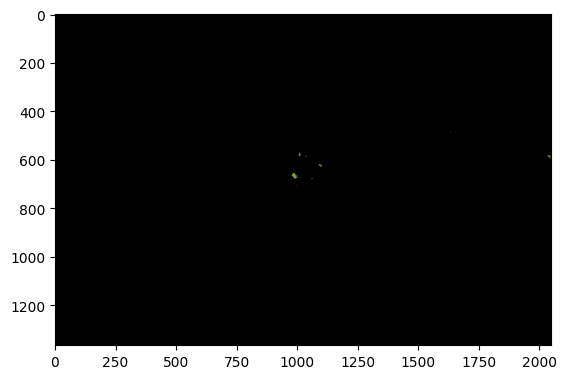

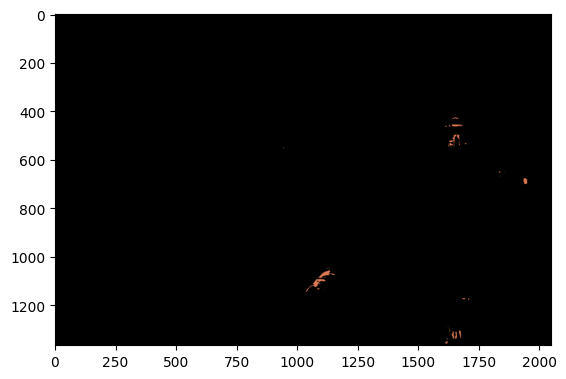

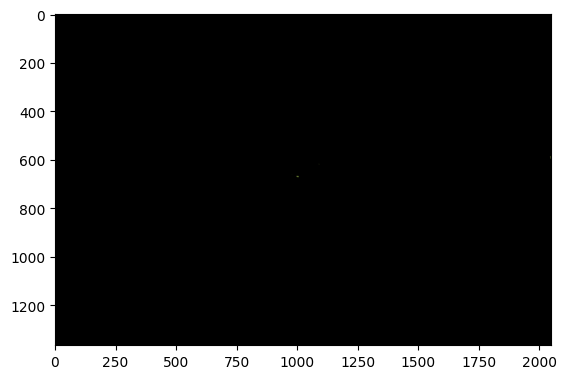

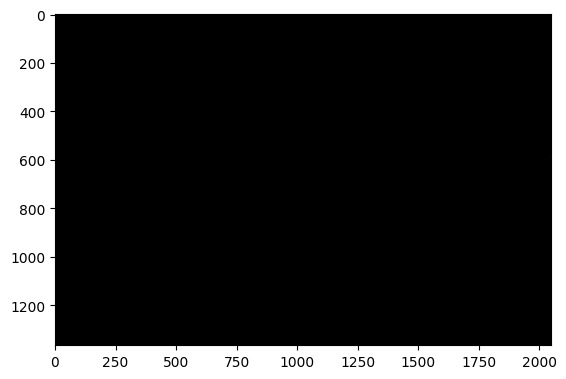

In [47]:
for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()




# **Exercício 2 - Mean Shift Aplicado ao Conjunto de Dados do Titanic**

---


Em 15 de abril de 1912, o Titanic colidiu com um iceberg e afundou. Quando o Titanic afundou, matou 1502 de 2224 passageiros e tripulantes.
Nesta seção, você aplicará o agrupamento Mean-Shift em características como idade, gênero, classe, etc.
Em seguida, determinaremos se há uma relação entre a sobrevivência e os diferentes clusters.
A tabela a seguir resume os dados:

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>


# **Pré-Processamento dos Dados**

---

Carregando os dados

In [63]:
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos dropar as seguintes colunas
'Name','Ticket','Cabin','PassengerId','Embarked'  para simpplificar



In [64]:
df=df.drop(columns=['Name','Ticket','Cabin','PassengerId','Embarked'])

Vamos binarizar, usando 0 para pessoas do sexo feminino e 1 para pessoas do sexo masculino.

In [65]:
df.loc[df['Sex']!='male','Sex']=0
df.loc[df['Sex']=='male','Sex']=1

In [66]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


Checando se há dados faltantes

In [67]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

Aqui, substituímos os valores ausentes em idade, pela idade média.

In [68]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

Atribuiremos o dataframe a X, para agrupamento, e descartaremos nossa coluna alvo, a coluna Sobrevivência.

In [69]:
X=df.drop(columns=['Survived'])

Agora, vamos padronizar os dados X:

In [70]:
X=df.apply(lambda x: (x-x.mean())/(x.std()+0.0000001), axis=0)

In [71]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,-0.788829,0.826913,0.737281,-0.592148,0.432550,-0.473408,-0.502163
1,1.266278,-1.565228,-1.354812,0.638430,0.432550,-0.473408,0.786404
2,1.266278,0.826913,-1.354812,-0.284503,-0.474279,-0.473408,-0.488580
3,1.266278,-1.565228,-1.354812,0.407697,0.432550,-0.473408,0.420494
4,-0.788829,0.826913,0.737281,0.407697,-0.474279,-0.473408,-0.486064


**Aplique o mean-shift ao dataframe Titanic X:**


---


Para aplicar o algoritmo mean-shift ao X, primeiro use a função estimate_bandwidth para estimar o valor para o parâmetro de largura de banda. Em seguida, crie um objeto MeanShift e ajuste-o ao X:

In [72]:
bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=bandwidth , bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=2.6395838673142666, bin_seeding=True)

Em seguida, anexamos os clusters ao conjunto de dados para análise.

In [73]:
X['cluster']=ms.labels_
df['cluster']=ms.labels_

Agora, agrupamos por clusters, para ver que certos clusters têm uma maior chance de sobrevivência.

In [74]:
df.groupby('cluster').mean().sort_values(by=['Survived'], ascending=False)

,Survived,Pclass,Age,SibSp,Parch,Fare
cluster,,,,,,
5,1.000000,1.000000,35.333333,0.000000,0.333333,512.329200
4,0.750000,1.000000,27.822048,0.857143,1.250000,195.894643
0,0.381313,2.313131,30.734477,0.285354,0.199495,23.992865
3,0.307692,2.846154,38.692308,0.769231,4.230769,29.377562
1,0.260870,2.913043,8.745575,3.239130,1.543478,30.968026
2,0.000000,3.000000,29.699118,8.000000,2.000000,69.550000
6,0.000000,1.000000,61.000000,0.500000,3.000000,188.137500


A partir da tabela acima, vemos que existem 7 clusters gerados pela análise de mean-shift, cada cluster contém a porcentagem média de sobreviventes.

Por exemplo, o cluster 5, tem 100% de sobreviventes, com a idade média de 35.3, passageiros pertencentes à 1ª classe, e os passageiros que pagaram a tarifa mais alta, 512.33 por bilhete. Curiosamente, o Cluster 6, tem 0% de sobreviventes, com a idade média de 61, também pertencendo à 1ª classe e com a tarifa de bilhete na faixa média. Não é surpreendente que as maiores chances de sobrevivência fossem mantidas pelos grupos de passageiros mais jovens e ricos.

# **Como funciona o Mean Shift (Opcional)**

---


O algoritmo Mean Shift começa colocando um círculo centrado em cada instância; então, para cada círculo, ele calcula a média de todas as instâncias localizadas dentro dele e desloca o círculo para que esteja centrado na média. Em seguida, ele itera esta etapa de deslocamento da média até que todos os círculos parem de se mover (ou seja, até que cada um deles esteja centrado na média das instâncias que contém). O Mean Shift desloca os círculos na direção de maior densidade, até que cada um deles tenha encontrado um máximo de densidade local. Finalmente, todas as instâncias cujos círculos se estabeleceram no mesmo lugar (ou perto o suficiente) são atribuídas ao mesmo cluster.
Na próxima seção, revisaremos a Estimação de Densidade do Kernel, depois derivaremos o vetor Mean Shift e mostraremos como ele encontra os valores máximos da distribuição. Esta seção é opcional e você pode pular e ir para as próximas seções, onde aplicamos o algoritmo Mean Shift aos dados reais.
## **Estimação de Densidade do Kernel**

Vamos supor que temos {𝒙1,…,𝒙𝑛} amostras D dimensionais, pode ser difícil calcular o histograma para a estimação de densidade, mas podemos representar a densidade usando a Estimação de Densidade do Kernel (KDE).

O Kernel é uma Função de 𝒙 e a amostra 𝒙𝑖, por exemplo, o kernel gaussiano da amostra 𝑖−𝑡ℎ é dado por:


 $K_{h}(\boldsymbol{x}-\boldsymbol{x}_{i})={\frac {1}{{\sqrt {2\pi h }^D} }}e^{-{\frac {|\boldsymbol{x}-\boldsymbol{x}_{i}|^{2}}{2h^{2}}}}$



$h$ é um parâmetro de largura de banda e é um parâmetro livre, podemos codificar o kernel em Python como uma função da distância   $|\boldsymbol{x}-\boldsymbol{x}_{i}|^{2}$ and $h$ :

In [75]:
def gaussian(d, h):
    return np.exp(-0.5*((d/h))**2) / (h*math.sqrt(2*math.pi))

Existem muitos tipos de kernels, escolhemos o Kernel Gaussiano pela simplicidade.

Podemos calcular a função Kernel para 𝑥1=1, a qual nos referiremos como amostra s, 𝑥 estará no intervalo entre −2<𝑥<4. Vamos tentar para ℎ=1 e ℎ=3.

In [76]:
s=1 # a sample point

x = np.linspace(-2, 4, num=200)
dist=np.sqrt(((x-s)**2))
kernel_1=gaussian(dist, 1)
kernel_2=gaussian(dist, 3)

Podemos traçar as funções do kernel para os diferentes valores de ℎ, e sobrepor o histograma, que é zero em todos os lugares, exceto onde o ponto de dados existe:

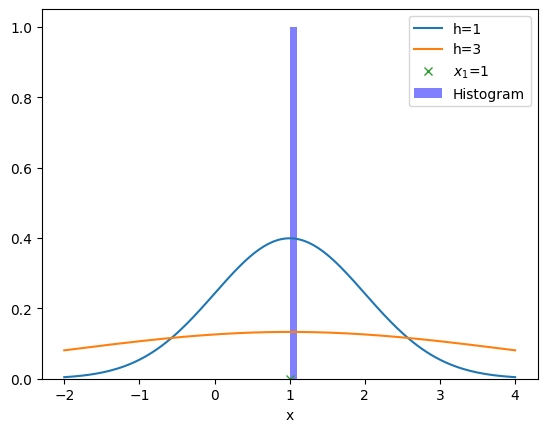

In [77]:
plt.plot(x,kernel_1,label='h=1')
plt.plot(x,kernel_2,label='h=3')
plt.plot(s,0,'x',label="$x_{1}$=1")
plt.hist(s, 10, facecolor='blue', alpha=0.5,label="Histogram")
plt.xlabel('x')
plt.legend()
plt.show()

Vemos que para x próximo ao nosso ponto de amostra (𝑥1 = 1), a função do kernel gaussiano retorna valores maiores; para x distante de 𝑥1, a função do kernel retorna valores menores que se aproximam de 0.

Para muitas amostras, a KDE é dada por:

 ${\hat {f}}_{h}(x)={\frac {1}{n h^{D}}}\sum _{i=1}^{n}K_{h}(\boldsymbol{x}-\boldsymbol{x}_{i})$

Em Python, geramos o KDE com largura de banda ℎ para um conjunto de pontos 𝑥𝑖, armazenados no array NumPy S, no intervalo de 𝑥, da seguinte maneira:

In [78]:
def kernel_density(S,x,h=1):

    density=np.zeros((200))
    for s in S:
        #Determine the distance and kernel for each point
        dist=np.sqrt(((x-s)**2))
        kernel=gaussian(dist, h)
        #Find the sum
        density+=kernel
    #Normalize the sum
    density=density/density.sum()

    return density

Considere os seguintes pontos de dados:

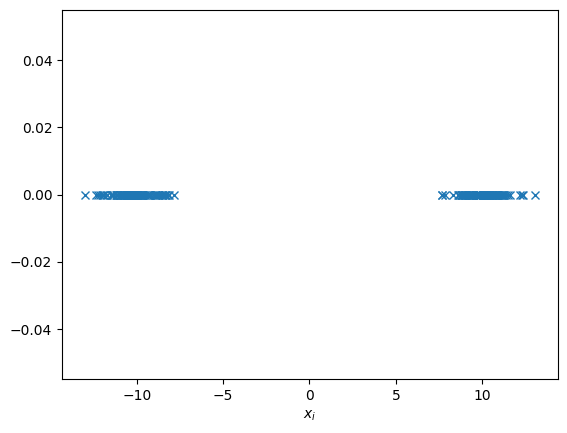

In [79]:
S=np.zeros((200))
S[0:100] = np.random.normal(-10, 1, 100)
S[100:200]=np.random.normal(10, 1, 100)
plt.plot(S,np.zeros((200)),'x')
plt.xlabel("$x_{i}$")
plt.show()

Podemos gerar a densidade de uma área específica 𝑥
 .

In [80]:
x = np.linspace(S.min()-3, S.max()+3, num=200)
density=kernel_density(S,x)

Podemos traçar os resultados juntamente com as localizações dos clusters. Eles devem corresponder aos dois picos da distribuição.

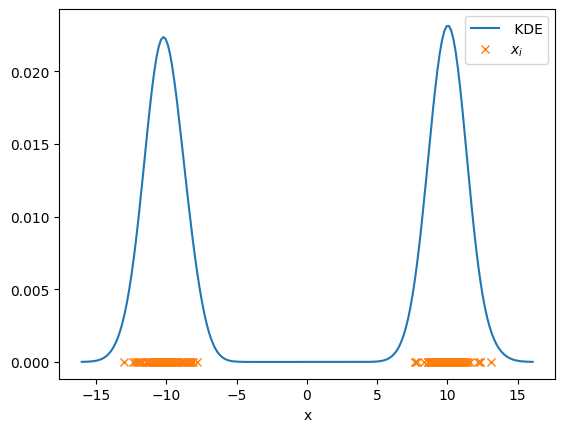

In [81]:
plt.plot(x,density,label=" KDE")
plt.plot(S,np.zeros((200,1)),'x',label="$x_{i}$")
plt.xlabel('x')
plt.legend()
plt.show()

Para encontrar os dois máximos, podemos aplicar o Gradiente Ascendente a cada vetor  $\{\boldsymbol{x}_{1},..,\boldsymbol{x}_{n}\}$:

$ \boldsymbol{\hat{x}}^{k+1}_i := \boldsymbol{\hat{x}}^{k}_i + \eta \nabla {\hat {f}}_{h}(\boldsymbol{\hat{x}}^{k}_i) $


Por exemplo, definimos para em seguida $\boldsymbol{\hat{x}}^{0}_{1}=\boldsymbol{x}_1$, , aplicamos:

$ \boldsymbol{\hat{x}}^{k+1}_1 := \boldsymbol{\hat{x}}^{k}_1 + \eta \nabla {\hat {f}}_{h}(\boldsymbol{\hat{x}}^{k}_1) $

 for $\boldsymbol{\hat{x}}^{0}_{2}=\boldsymbol{x}_2$, aplicamos:

$ \boldsymbol{\hat{x}}^{k+1}_2 := \boldsymbol{\hat{x}}^{k}_2 + \eta \nabla {\hat {f}}_{h}(\boldsymbol{\hat{x}}^{k}_2) $

Mean Shift é um método alternativo para selecionar um bom valor para $\eta$ e $h$ , de modo que cada $ \boldsymbol{\hat{x}}^{k+1}_i$ deve se aproximar dos dois máximos.


# **Mean Shift a partir do zero **

---


Para encontrar o pico da distribuição, calculamos o gradiente. O vetor de deslocamento médio é proporcional ao gradiente e sempre aponta para a direção do aumento máximo na densidade. A expressão para o deslocamento médio é mostrada aqui junto com o código Python:


 $\nabla  {\hat {f}}_{h}(\boldsymbol{x}) \varpropto\ \boldsymbol{m}_h(\boldsymbol{x})=\frac{ \sum_{i} K'(\boldsymbol{x}_i - \boldsymbol{x}) \boldsymbol{x}_i } {\sum_{i} K'(\boldsymbol{x}_i - \boldsymbol{x})}-\boldsymbol{x} $

onde $K'$ é a derivada do kernel, podemos exibir os valores de deslocamento médio para <code>S</code> as da seguinte maneira::


In [84]:
mean_shift=((density.reshape(-1,1)*S).sum(0) / density.sum())-x

Se sobrepusermos o valor do deslocamento médio sobre a distribuição, $\boldsymbol{m}_h(\boldsymbol{x})$,veremos que os vetores apontam para os dois picos.

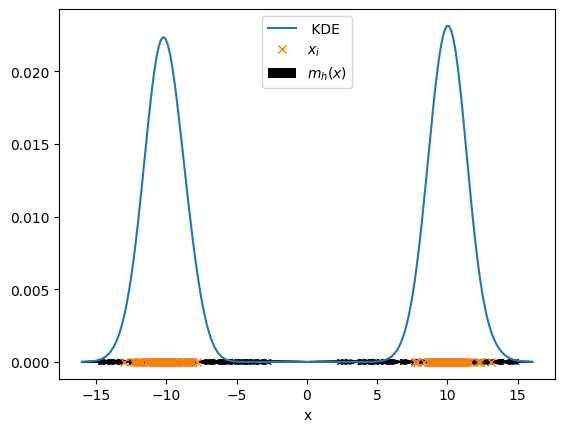

In [85]:
plt.plot(x,density,label=" KDE")
plt.plot(S,np.zeros((200,1)),'x',label="$x_{i}$")
plt.quiver(x, np.zeros((200,1)),mean_shift, np.zeros((200,1)), units='width',label="$m_{h}(x)$")
plt.xlabel('x')
plt.legend()
plt.show()

Ao inserir o valor do vetor de deslocamento médio na expressão para o gradiente ascendente, obtemos:


$ \boldsymbol{\hat{x}}^{k+1}_i := \boldsymbol{\hat{x}}^{k}_i + \eta \nabla {\hat {f}}_{h}(\boldsymbol{\hat{x}}^{k}_i) \approx\boldsymbol{x}^{k}_i +  \boldsymbol{m}_h(\boldsymbol{\hat{x}}^{k}_i)$

$ \boldsymbol{\hat{x}}^{k+1}_i := \boldsymbol{\hat{x}}^{k}_i +\frac{ \sum_{i} K(\boldsymbol{x}_i -\boldsymbol{\hat{x}}^{k}_i) \boldsymbol{x}_i } {\sum_{i} K(\boldsymbol{x}_i - \boldsymbol{\hat{x}}^{k}_i)}-\boldsymbol{\hat{x}}^{k}_i$

$ \boldsymbol{\hat{x}}^{k+1}_i := \frac{ \sum_{i} K(\boldsymbol{x}_i -\boldsymbol{\hat{x}}^{k}_i) \boldsymbol{x}_i } {\sum_{i} K(\boldsymbol{x}_i - \boldsymbol{\hat{x}}^{k}_i)}$

Podemos executar o algoritmo por três iterações, cada ponto deve convergir para os centros dos clusters:

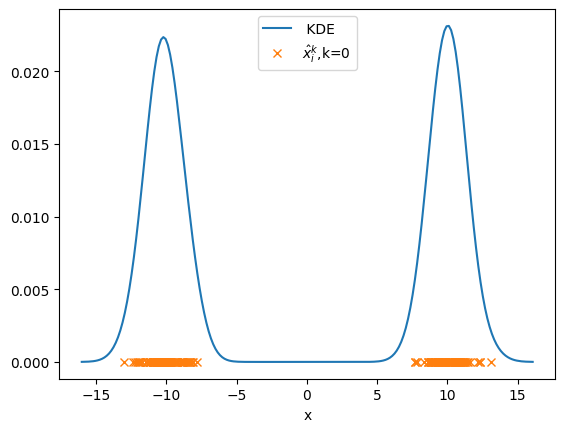

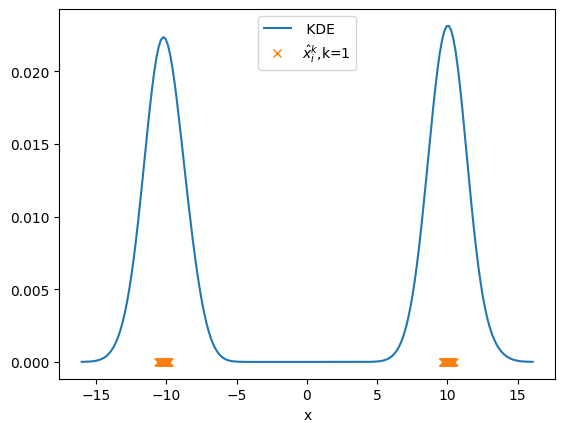

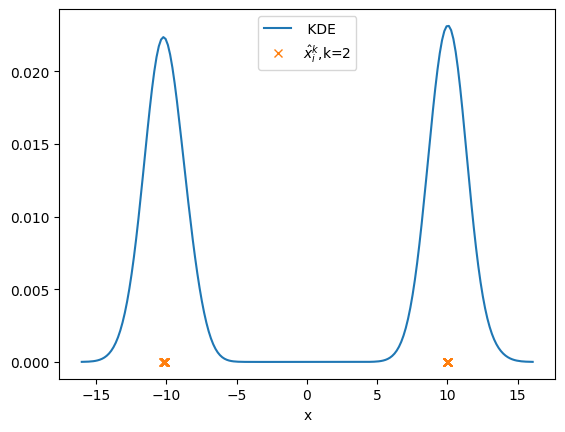

In [86]:
Xhat=np.copy(S.reshape(-1,1))
S_=S.reshape(-1,1)


for k in range(3):
    plt.plot(x,density,label=" KDE")
    plt.plot(Xhat,np.zeros((200,1)),'x',label="$\hat{x}^{k}_i$,k="+str(k))
    plt.xlabel('x')
    plt.legend()
    plt.show()

    for i,xhat in enumerate(Xhat):
        dist=np.sqrt(((xhat-S_)**2).sum(1))
        weight = gaussian(dist, 2.5)
        Xhat[i] = (weight.reshape(-1,1)*S_).sum(0) / weight.sum()


Na prática, vamos descartar muitos dos pontos de dados, à medida que eles se aproximam. Aqui está uma maneira rápida.

In [87]:
np.unique(Xhat.astype(int))

array([-10,  10])